In [1]:
pip install diffusers transformers scipy accelerate 

     |████████████████████████████████| 503 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 191 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 757 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 6.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


In [3]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token, device_map="auto", cache_dir="stable_diffusion_cache")
pipe = pipe.to(device)

Fetching 16 files: 100%|████████████████████████████████████████████████████████████████| 16/16 [00:08<00:00,  1.79it/s]


In [13]:
"""scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")"""

Fetching 16 files: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 6979.60it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [5]:
prompt = "teachers tenure"
image = pipe(prompt).images[0]

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [00:27<00:00,  1.80it/s]


In [6]:
path = "image_results/"
image_name = "teachers_tenure"

image.save(path + image_name + ".png")

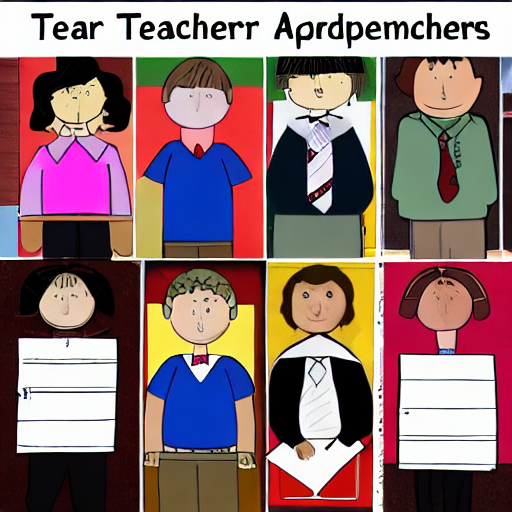

In [7]:
from PIL import Image

image = Image.open(path + image_name + ".png")
image.show()